#### Декомпозиция 

Загрузка данных

Знакомство с данными.

 Предобработка данных

На данном этапе, посмотрим соответствие типов данных. Рассмотрим данные на предмет дубликатов, на предмет пропущенных значений. При возможности заполним пропуски. 

Исследовательский анализ данных

Рассмотрим анализ распределений (по возрасту, доходу, имуществу, полу, городам) построим гистограммы, боксплоты. Построим график корреляции.

Проверка гипотез

На основе EDA проверим несколько гипотез о статистической значимости результатов

Сегментация клиентов

На основе предыдущих этапов проведем сегментацию клиентов. Расставим приоритеты в сегментах

Пропишем итоговые выводы и рекомендации

<a href="https://cloud.mail.ru/public/iV6j/v6X2Zi4o8">Ссылка на презентацию</a>

<h1> Банк — Анализ оттока
клиентов </h1>

<font size="3"><strong>Описание проекта</strong></font><br><br>
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:
- USERID — идентификатор пользователя,
- Банки — Анализ оттока клиентов 2
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.
<br><br>
<font size="3"><strong>Цель проекта:</strong></font><br><br>
Проанализировать клиентов регионального банка и выделить сегменты клиентов,
которые склонны уходить из банка.



<font size="3"><strong>План проекта:</strong></font>

1. [Импорт библиотек](#1)

2. [Загрузка данных](#2)

3. [Предобработка данных](#3)

3.1. [Замена названий столбцов](#4)

3.2. [Проверим есть ли выбросы](#5)

3.3. [Обработка пропущенных значений](#6)

3.4. [Проверка дубликатов](#7)

4. [Исследовательский анализ данных](#8)

4.1. [Посмотрим на изначальное распределиние признаков](#9)

4.2. [Проверка распределения числовым данным в зависимости от churn клиента](#10)

4.3. [Проверим отток по категориальным данным](#11)

4.4. [Процентное распределение оттока в категориальных данных](#12)

4.5. [Матрица корреляции](#13)

4.6. [Корреляция по phik](#14)

4.7. [Портрет клиента](#15)

4.8. [Вывод](#16)

5. [Проверка статистических гипотез](#17)

5.1. [Проверка гипотез равенстве долей ушедших клиентов среди клиентов у которых есть/нет кредитных карт.](#18)

5.2. [Проверка гипотезы о различии возраста между ушедшими и оставшимися клиентами](#19)

5.3. [Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались](#20)

5.4. [Вывод по проверке статистических гипотез:](#30)

6. [Сегментация клиентов](#21)

6.1. [Распределим сегоменты по приоритету](#22)

6.2. [Приоритет номер 1: Сегмент по полу, наличию крединой карты и балансу ](#23)

6.3. [Приоритет номер 2: Сегменты по балансу, собственности и возрасту](#24)

6.4. [Приоритет номер 3: Сегменты по полу, кредитному рейтингу и балансу](#25)

6.5. [Вывод по итогам сегментации клиентов](#26)

7. [Итоговый вывод](#27)

<a id='1'></a>
#### Импорт библиотек

In [1]:
! pip install phik -q
import time
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from pandas.plotting import register_matplotlib_converters
import warnings
import plotly.graph_objects as go
import math
import plotly.express as px
from folium.plugins import MarkerCluster
import folium
from statsmodels.stats.proportion import proportions_ztest
import warnings
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import phik
from phik import report
import itertools
warnings.filterwarnings('ignore')

In [2]:
# Установка максимального количества отображаемых столбцов
pd.set_option('display.max_columns', None)
# Установка максимальной ширины стоблцов df
pd.set_option('display.max_colwidth', None)

<a id='2'></a>
#### Загрузка данных

In [3]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
display(df.head(), df.tail())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Всего имеем 10000 строк с данными. Нужно привести к нижнему регистру названия столбцов USERID и EST_SALARY. Видим 26 пропущенных значений в столбцу age, так же 2295 пропущеных значений в столбце balance. Типы данных в столбцах соответствуют содержанию.

<a id='3'></a>
#### Предобработка данных

<a id='4'></a>
##### Приведение названий столбцов к нижнему регистру

In [6]:
# Приведение названий столбцов к нижнему регистру
df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True)

<a id='5'></a>
##### Проверим есть ли выбросы

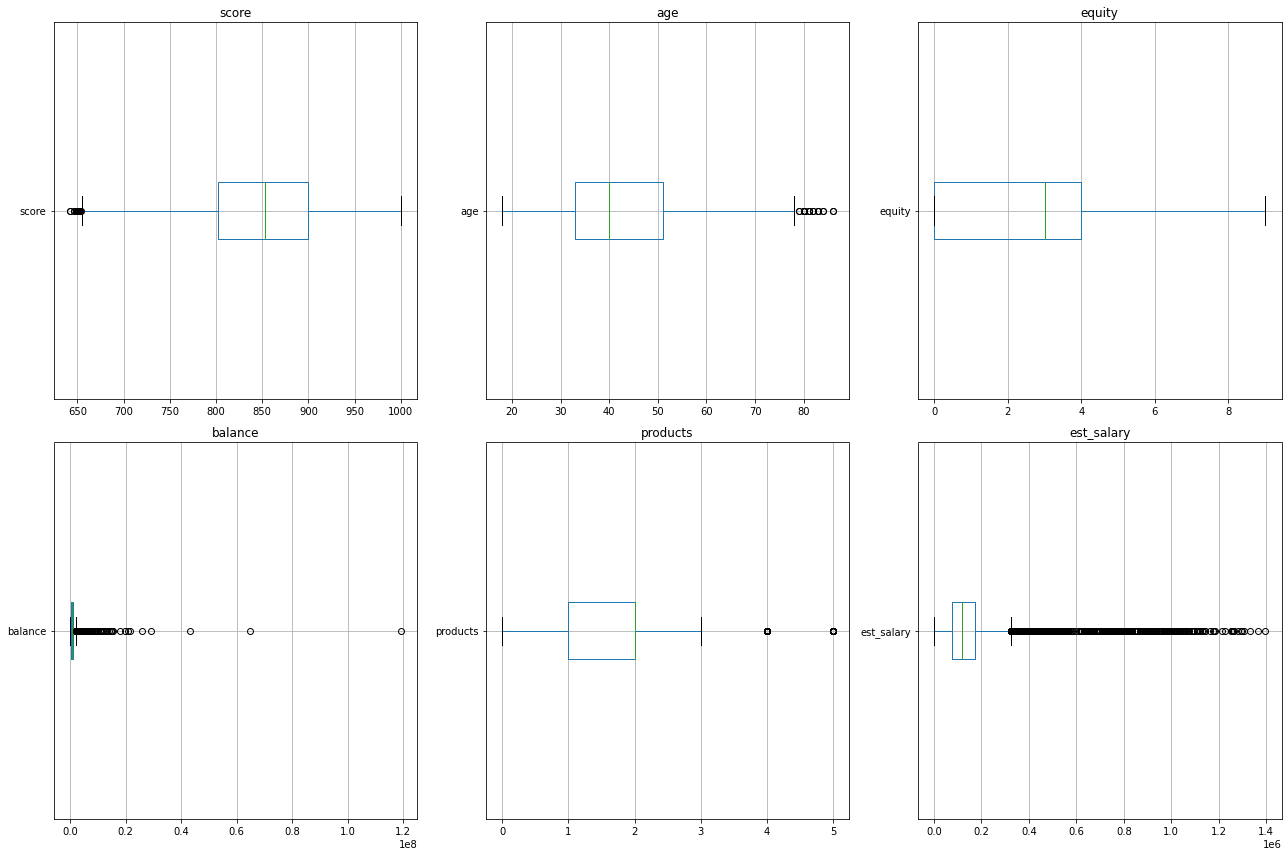

In [7]:
# Создадим boxplot для анализа выбросов
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
columns_to_plot = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

for col, ax in zip(columns_to_plot, axes.flatten()):
    df.boxplot(column=col, ax=ax, vert=False)
    ax.set_title(col)

plt.tight_layout()
plt.show()

<ul>score: Выбросов не наблюдается.</ul>
<ul>age: Есть несколько выбросов для очень высоких значений.</ul>
<ul>equity: Распределение сильно скошено влево, с несколькими значительными выбросами в правой части.</ul>
<ul>balance: Присутствуют значительные выбросы для очень высоких значений баланса.</ul>
<ul>products: Похоже, что большинство пользователей использует от 1 до 2 продуктов, но есть несколько выбросов для пользователей, использующих более 3 продуктов. Так же видим products с нулевым значением, это анамальный выброс, не может клиента с нулем банковских продуктов</ul>
<ul>est_salary: Большое количество выбросов примерно после 300 тысяч.</ul>

In [8]:
# Удаление строк c нулевым значением products 
df = df.query('products != 0')

<a id='6'></a>
##### Обработка пропущенных значений

In [9]:
# Создание признаков для индикации пропусков в данных
missing_indicators = df.isnull().astype(int).add_suffix('_missing')

# Добавление этих признаков в основной датафрейм
df_with_missing = df.join(missing_indicators)

# Удаление столбца id из анализа (предполагается, что имя столбца 'id', замените на актуальное, если отличается)
df_with_missing = df_with_missing.drop(columns=['user_id'])

# Вычисление количества пропусков в каждом столбце
missing_counts = df.isnull().sum()

# Проверим корреляции новых признаков пропусков с другими переменными
correlation_with_missing = df_with_missing.corr().filter(like='_missing').drop(index=missing_indicators.columns)

print(missing_counts)

print('-'*80)

print(correlation_with_missing[['age_missing', 'balance_missing']].head(10))

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64
--------------------------------------------------------------------------------
               age_missing  balance_missing
score             0.005045         0.138598
age                    NaN        -0.029226
equity           -0.032039        -0.710106
balance           0.007686              NaN
products         -0.033772        -0.487297
credit_card       0.009719         0.158645
last_activity     0.025116         0.028561
est_salary        0.011248         0.307379
churn            -0.018987        -0.249907


В случае с age корреляция низкая, в случае с balance по Чеддоку отрицательная корреляция заметная(-0.48) с balance  и высокая отрицательная корреляция(-0.7) с equity.

Создадим сводную таблицу, что бы посмотреть на различия данных с пропусками по столбцам balance и age

In [10]:
# Создание сводных таблиц для анализа
summary_tables = {}

# Функции агрегации
aggregations = {
    'est_salary': 'mean',
    'age': 'mean',
    'products': 'median',
    'equity': 'median',
    'balance': 'mean',
    'city': lambda x: x.mode()[0],
    'gender': lambda x: x.mode()[0]
}

# Создание сводных таблиц для переменных с пропусками
for column in ['age_missing', 'balance_missing']:
    # Агрегирование данных по группам
    summary_table = df_with_missing.groupby(column).agg(aggregations)
    
    # Выбор только числовых столбцов для вычисления разницы
    numeric_columns = summary_table.select_dtypes(include=[np.number]).columns
    
    # Вычисление относительных разниц
    diff = summary_table[numeric_columns].diff().iloc[-1]
    relative_diff = pd.Series(np.nan, index=summary_table.columns)  # Создание серии с NaN
    for col in numeric_columns:
        relative_diff[col] = (diff[col] / summary_table.iloc[0][col] * 100 if summary_table.iloc[0][col] != 0 else np.nan)
    relative_diff.name = 'Relative Difference (%)'
    # Добавление строки с разницей в сводную таблицу
    summary_table = summary_table.append(relative_diff)
    
    # Сохранение таблицы в словаре
    summary_tables[column] = summary_table

print(summary_tables['age_missing'].T)
print('-'*70)
print(summary_tables['balance_missing'].T)

age_missing              0              1 Relative Difference (%)
est_salary   147799.115241  178585.199231               20.829681
age              42.730773            NaN                     NaN
products               2.0            1.0                   -50.0
equity                 3.0            0.0                  -100.0
balance      827245.587515    1250033.573               51.107917
city             Ярославль      Ярославль                     NaN
gender                   М              М                     NaN
----------------------------------------------------------------------
balance_missing              0              1 Relative Difference (%)
est_salary       124501.872366  226397.935876               81.842997
age                  42.924366      42.076822               -1.974507
products                   2.0            1.0                   -50.0
equity                     4.0            0.0                  -100.0
balance           827794.30651            NaN      

Видим что в данных с пропусками в age на 20% выше est_salary. На 50% ниже products и на 100% ниже equity.Balance у данных с пропусками по age на 50% выше чем у данных без пропусков. Equity у данных с пропусками по age нулевой.
В данных с пропусками по balance на 81% выше est_salary. На 50% ниже products и на 100% ниже equity. Equity у данных с пропусками по balance нулевой.

По скольку поле возраст влияет мало на какие столбцы, но мы не хотим терять эти данные, то заменим пропущенные значения в возрасте на средние значения по датасету, тем самым это не повлияет на распределение возраста по нашим данным.

In [11]:
df['age'].fillna(df['age'].mean(), inplace=True)

Данные по balance имеют пропуски чуть более 20 процентов, логически корректно заполнить их не получается, если заполним их средними значениями то сильно увеличим пропорцию средний значений в распределении. На данный момент ничего не буду делать с этими данными, оставим пропуски, на построение графиков они не повлияют.

 Пропуски в age отнесем к категории MCAR, эти пропуски не связаны с другими данными и являются случайными. Пропуски в balance отнесем к  MAR, посколько вероятность пропуска может быть определена на основе других данных, например products и equity. 

<a id='7'></a>
##### Проверка дубликатов

In [12]:
duplicates = df.duplicated().sum()
print("Количество дубликатов в данных:", duplicates)

Количество дубликатов в данных: 0


In [13]:
# Поиск дубликатов по userid
duplicated_user_ids = df[df.duplicated('user_id', keep=False)].sort_values('user_id')

# Поиск полных дубликатов строк с повторяющимися userid
full_duplicates = duplicated_user_ids[duplicated_user_ids.duplicated(keep=False)]

print(duplicated_user_ids.head(20))

print('-'*55)

print(full_duplicates.count())

      user_id  score       city gender        age  equity     balance  \
1893   116540  883.0    Рыбинск      Ж  55.000000       1   362756.49   
7694   116540  887.0  Ярославль      Ж  38.000000       0         NaN   
7542   117943  880.0  Ярославль      Ж  40.000000       0         NaN   
4866   117943  855.0    Рыбинск      Ж  32.000000       6  1036832.93   
5896   120258  905.0  Ярославль      М  30.000000       0         NaN   
5863   120258  908.0    Рыбинск      Ж  38.000000       4  2213581.63   
1411   123461  829.0  Ярославль      Ж  59.000000       0    96222.44   
8638   123461  934.0    Рыбинск      М  34.000000       0         NaN   
8164   124450  859.0  Ярославль      Ж  38.000000       6   516811.20   
9775   124450  758.0    Рыбинск      Ж  36.000000       0    73574.07   
4850   126368  909.0  Ярославль      Ж  30.000000       4  1322623.29   
5420   126368  832.0    Рыбинск      Ж  33.000000       0         NaN   
8785   127440  663.0  Ярославль      М  42.730773  

В результате анализа были найдены строки с повторяющимися userid, но нет полных дубликатов строк — все записи с дублированными userid имеют различия в одном или нескольких столбцах. Всего было найдено 146 строк с неявными дубликатами userid.

Отсутствие полных дубликатов означает, что хотя user_id повторяются, остальные данные в этих строках различаются. Это может быть следствием ошибок в данных.

Так же, на взгляд кажется, что нет одинаковых userid в одном городе, проверим это.

In [14]:
# Поиск дубликатов по комбинации userid и city
duplicated_user_city = df[df.duplicated(['user_id', 'city'], keep=False)].sort_values(['user_id', 'city'])

# Поиск полных дубликатов строк с повторяющимися userid и city
full_duplicates_user_city = duplicated_user_city[duplicated_user_city.duplicated(keep=False)]

print(duplicated_user_city) 

print(full_duplicates_user_city)

Empty DataFrame
Columns: [user_id, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []
Empty DataFrame
Columns: [user_id, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []


Не обнаружилось дубликатов по user_id и city, что может означать то что id уникальны только в рамках региональных подразделений и не уникальны по банку в целом. В данном случае не будем нечего делать с дубликатами.

<a id='8'></a>
#### Исследовательский анализ данных

<a id='9'></a>
##### Посмотрим на изначальное распределиние признаков

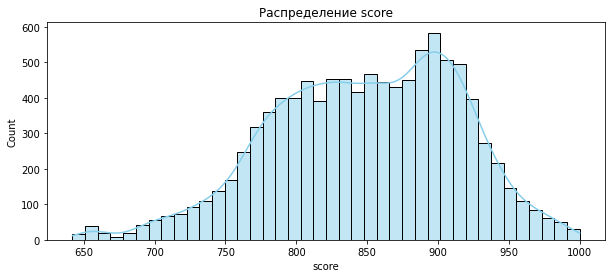

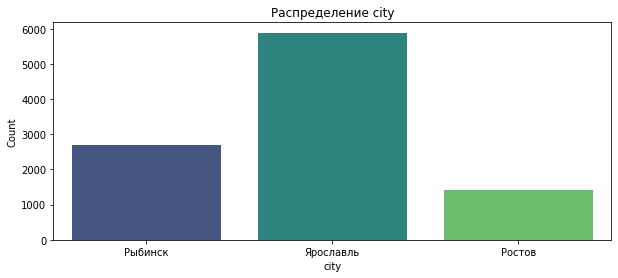

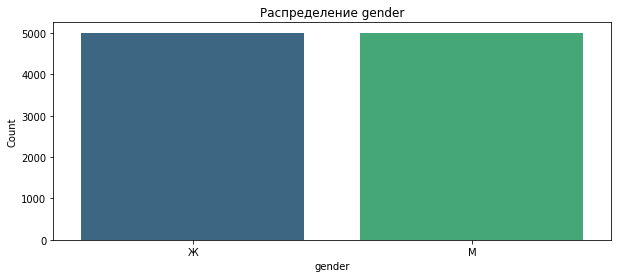

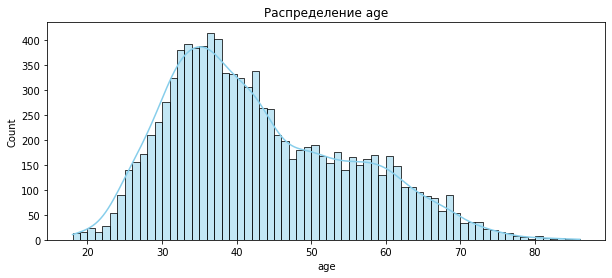

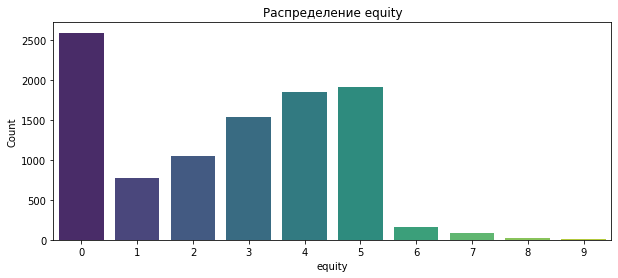

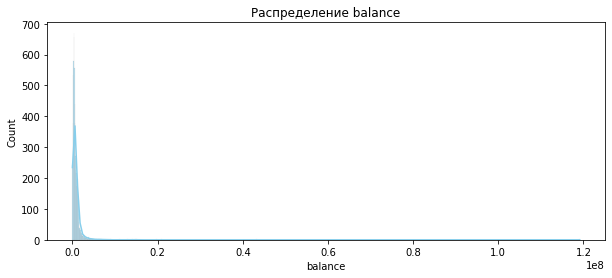

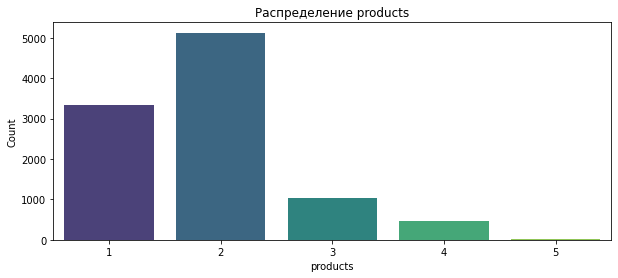

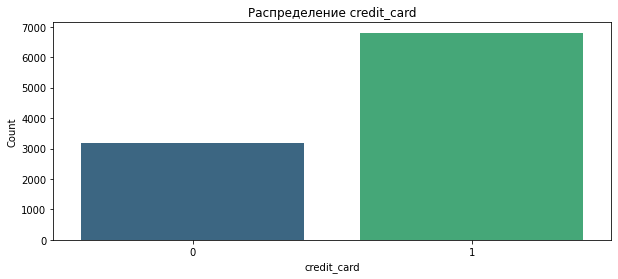

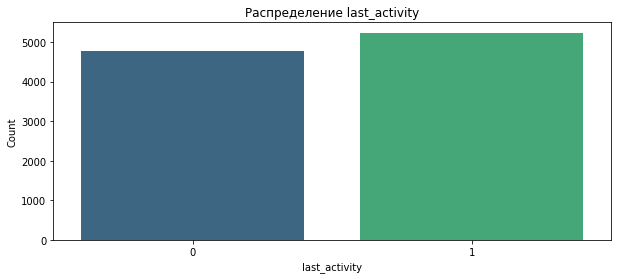

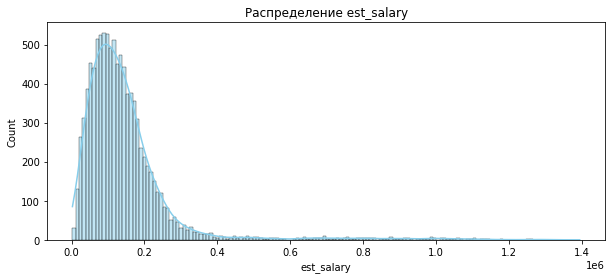

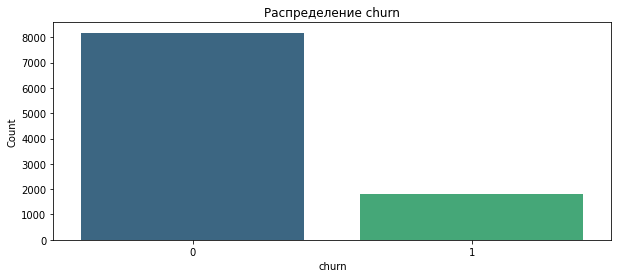

In [15]:
for column in df.columns:
    if column == 'user_id':  # Исключаем столбец user_id
        continue
    plt.figure(figsize=(10, 4))
    # Определение типа данных и выбор метода визуализации
    if df[column].dtype == 'object' or df[column].nunique() < 10 or column == 'equity':
        # Категориальные данные 
        sns.countplot(x=df[column], palette='viridis')
        plt.title(f'Распределение {column}')
    else:
        # Числовые данные
        bins = int(df[column].max() - df[column].min()) if column == 'age' else 'auto'
        sns.histplot(df[column], kde=True, bins=bins, color='skyblue')
        plt.title(f'Распределение {column}')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.show()

- По столбцу score видим в целом нормальное распределение, но есть смещение вершины вправо
- Большинство клиентов из Ярославля, далее Рыбинск и Ростов
- Распределение по полу равномерное, мужчин и женщин примерно одинаково
- Возраст напоминает нормальное распределение. Пик 30-40 лет, но правое крыло сильно увеличено относительно левого, из-за ограничения минимального возраста для клиента банка.
- Большинство клиентов не имеет никакого имущества, далее идут люди у которых 3, 4, 5 объектов имущества
- График баланса показывает, что явное большинство клиентов имеет на балансе до 50 000, и далее идет тонкое правое крыло распределения с клиентами у котрых баланс от 50 000 до 1200 000
- У большинства клиентов 2 банковской продукта, далее идет 1 продукт. 3 и 4 продукта у меньшинства людей.
- У большинства клиентов есть кредитная карта
- Большинство клиентов являются активными
- Доходы большинства клиентов в районе 100 000, с более крупным правым крылом распределения.
- Большинство клиентов из нашей базы являются клиентами банка на данный момент

<a id='10'></a>
##### Проверка распределения числовым данным в зависимости от churn клиента

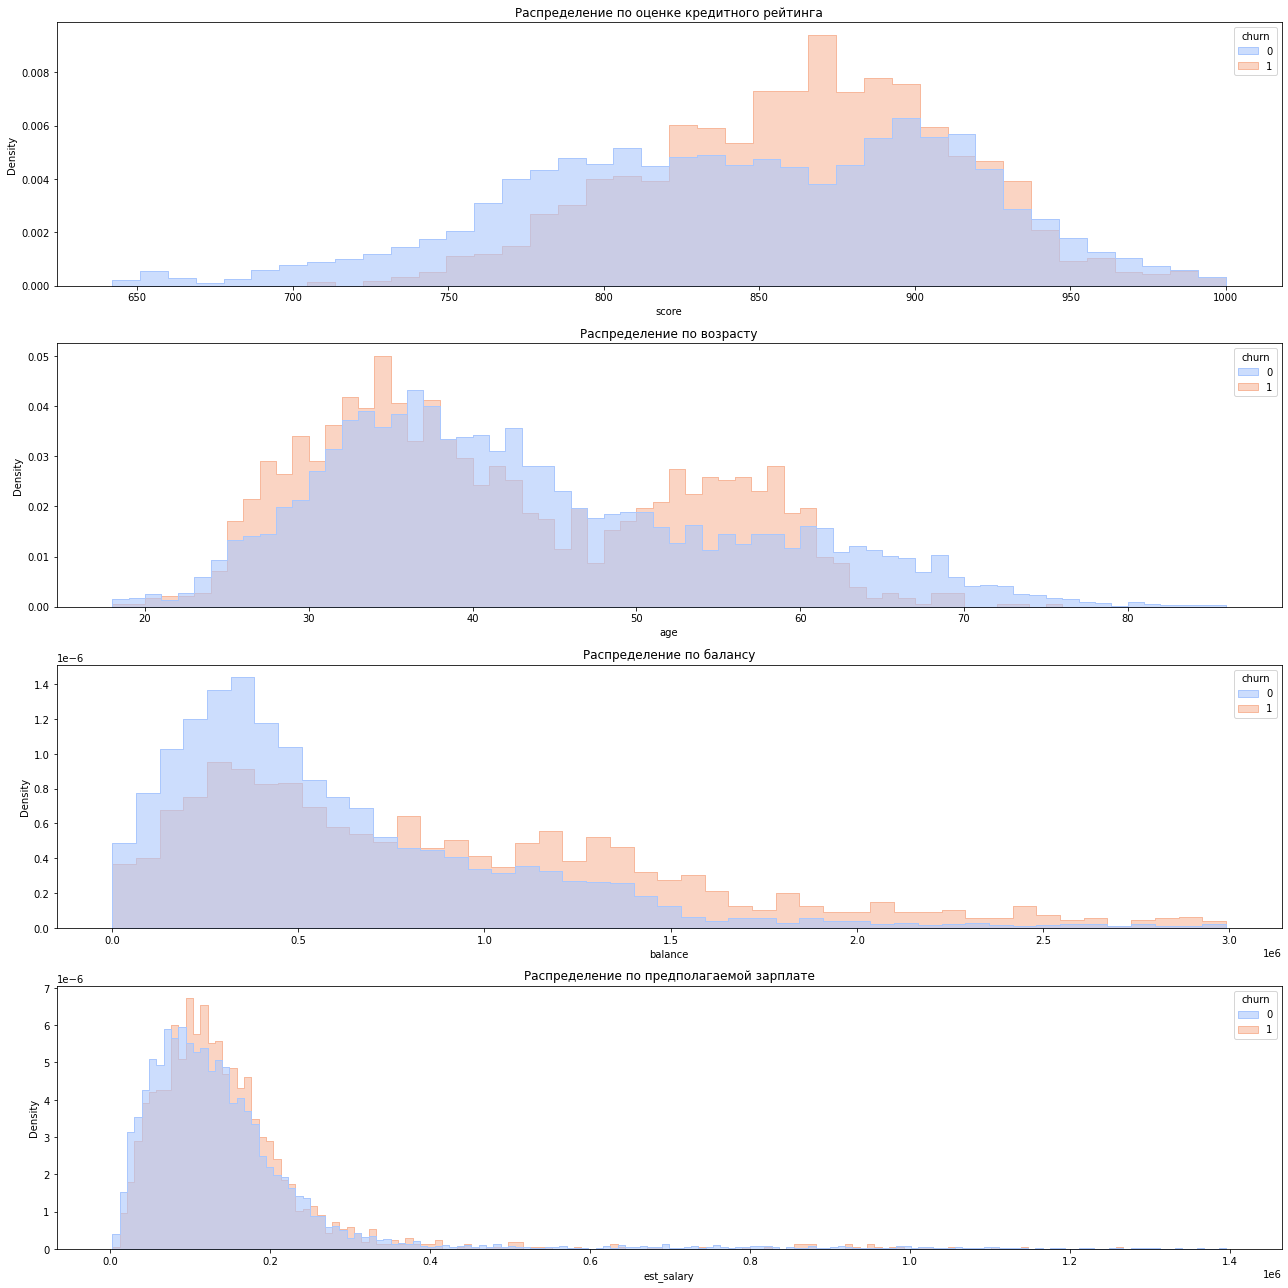

In [16]:
plt.figure(figsize=(18, 18))

# Построение распределения для 'score'
plt.subplot(4, 1, 1)
sns.histplot(data=df, x='score', hue='churn', element='step', stat="density", common_norm=False, palette="coolwarm", alpha=0.6)
plt.title('Распределение по оценке кредитного рейтинга')

# Построение распределения для 'age' 
plt.subplot(4, 1, 2)
age_bins = range(int(df['age'].min()), int(df['age'].max()) + 1) 
sns.histplot(data=df, x='age', hue='churn', element='step', stat="density", common_norm=False, palette="coolwarm", alpha=0.6, bins=age_bins)
plt.title('Распределение по возрасту')

# Построение распределения для 'balance'
plt.subplot(4, 1, 3)
sns.histplot(data=df[df['balance'] <= 3000000], x='balance', hue='churn', element='step', stat="density", common_norm=False, palette="coolwarm", alpha=0.6)
plt.title('Распределение по балансу')

# Построение распределения для 'est_salary'
plt.subplot(4, 1, 4)
sns.histplot(data=df, x='est_salary', hue='churn', element='step', stat="density", common_norm=False, palette="coolwarm", alpha=0.6)
plt.title('Распределение по предполагаемой зарплате')

plt.tight_layout()
plt.show()

Распределение по оценке кредитного рейтинга:
Видим что ушло много клиентов с хорошим средним рейтингом
Распределение по возрасту:
Уровень оттока повышенный среди людей от 25 до 35 лет. Так же видно повышенный уровень оттока у людей от 50 до 60 лет.
Распределение по балансу:
По распределению заметно что до 750 тысяч на балансе клиенты скорее остаются в банке, при балансе свыше 750 тысяч клиенты чаще уходят из банка.
Распределение по предполагаемой зарплате:
Распределение оттока по уровню зарплаты довольно равномерное, есть небольшой перевес на стороне оттока среди клиентов с зарплатой выше средней, но разница не велика, это может быть в рамках статистического отклонения.

<a id='11'></a>
##### Проверим отток по категориальным данным

Средний процент оттока по банку: 18.19181918191819


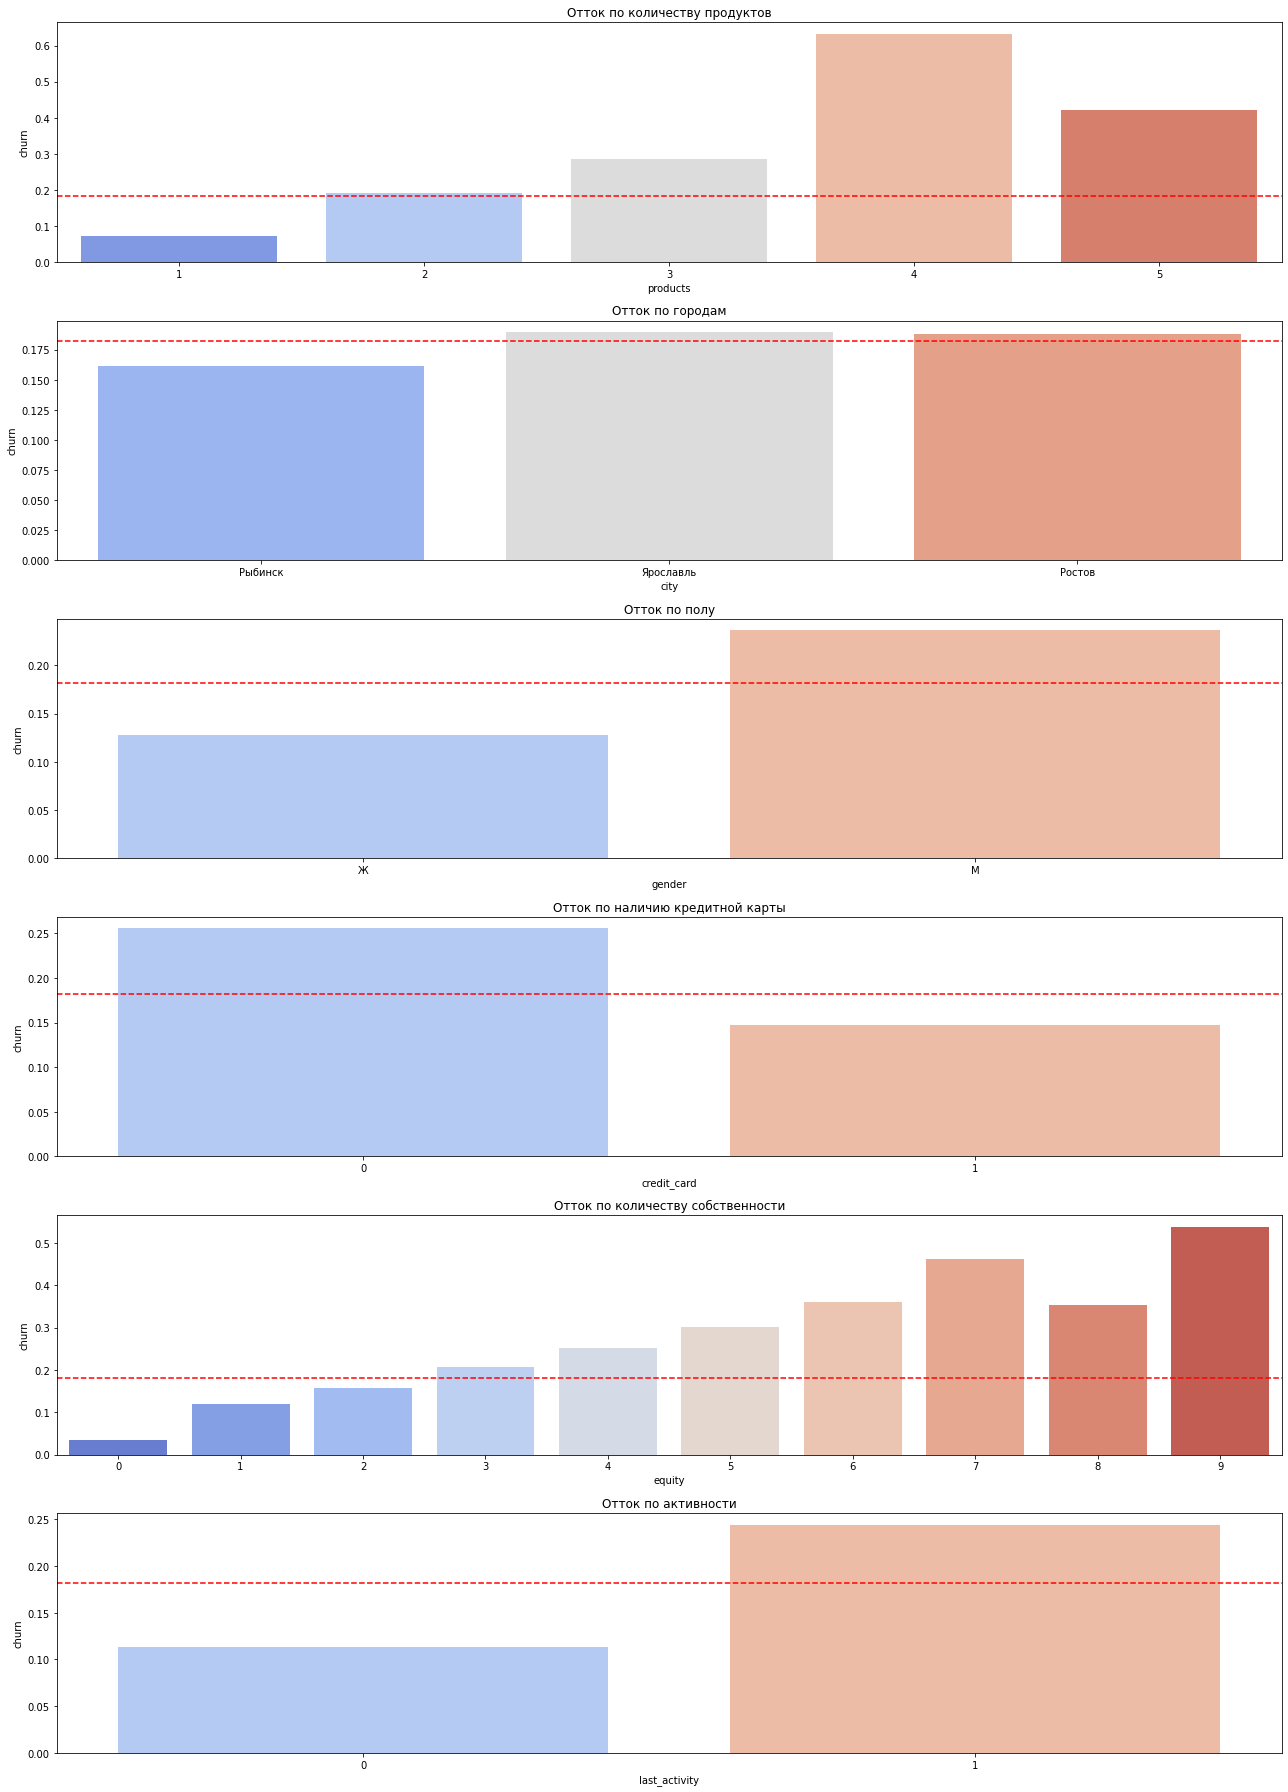

In [17]:
average_churn_rate = df["churn"].mean()
print(f'Средний процент оттока по банку: {df["churn"].mean()*100}')

plt.figure(figsize=(18, 25))

# Нарисуем распределение для 'products'
plt.subplot(6, 1, 1)
sns.barplot(x='products', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по количеству продуктов')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

# Нарисуем распределение для 'city'
plt.subplot(6, 1, 2)
sns.barplot(x='city', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по городам')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

# Нарисуем распределение для 'gender'
plt.subplot(6, 1, 3)
sns.barplot(x='gender', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по полу')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

# Нарисуем распределение для 'credit_card'
plt.subplot(6, 1, 4)
sns.barplot(x='credit_card', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по наличию кредитной карты')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

# Нарисуем распределение для 'products'
plt.subplot(6, 1, 5)
sns.barplot(x='equity', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по количеству собственности')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

# Нарисуем распределение для 'last_activity'
plt.subplot(6, 1, 6)
sns.barplot(x='last_activity', y='churn', data=df, palette="coolwarm", ci=None)
plt.title('Отток по активности')
plt.axhline(df['churn'].mean(), color='red', linestyle='--')

plt.tight_layout()
plt.show()

<ul>Отток по количеству продуктов:
    Наблюдается отток выше среднего уровня среди клиентов с  3, 4 и 2 продуктами. Клиенты с 1 или 2 продуктами демонстрируют более низкий уровень оттока. Данные по клиентам 5 продуктами не будем принимать в серьез, ввиду малого количества наблюдений ( 19 наблюдений по 5 продуктам) </ul>
<ul>Отток по городам:
Клиенты из города Ярославль имеют самый высокий уровень оттока по сравнению с другими городами. В городе Ростов отток ниже, а в Рыбинске — наименьший.</ul>
<ul>Отток по полу:
Среди мужчин ооток заметно выше среднего уровня. У женщин отток ниже среднего.</ul>
<ul>Отток по наличию кредитной карты: среди клиентов без кредитной карты отток выше среднего</ul>
<ul>Отток по баллам собственности: начиная с 3 баллов собственности, отточность у клиентов превышает среднюю по банку</ul>
<ul>Отток по активности: у активных клиентов отточность выше средней по банку</ul>

Красные пунктирные линии на графиках показывают средний уровень оттока по банку. Это помогает визуально сравнить, как отдельные значения признаков влияют на отток по сравнению со средним.

<a id='12'></a>
##### Процентное распределение оттока в категориальных данных

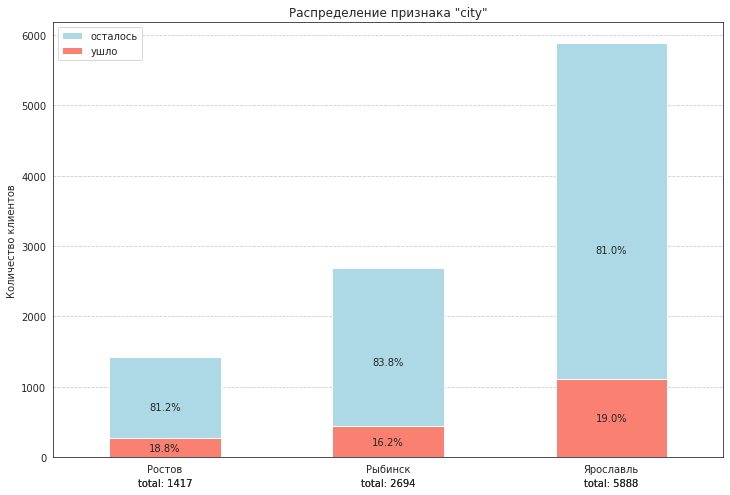

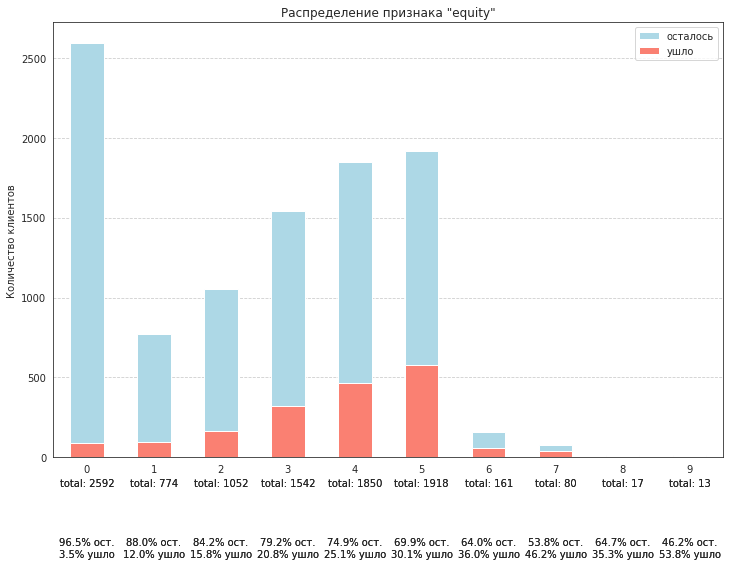

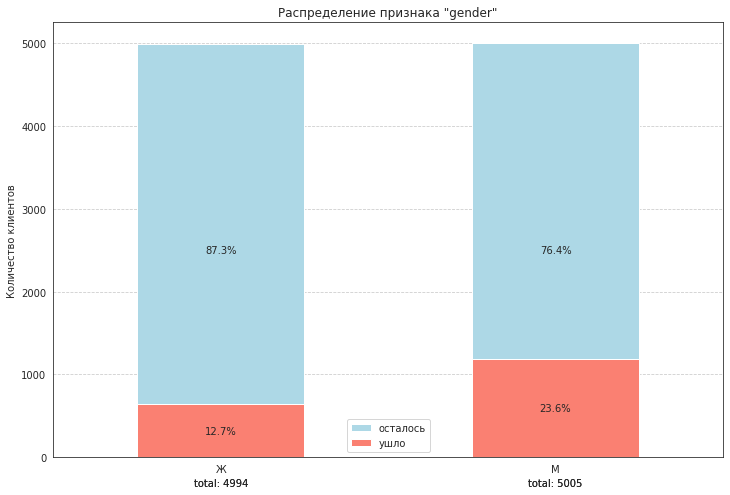

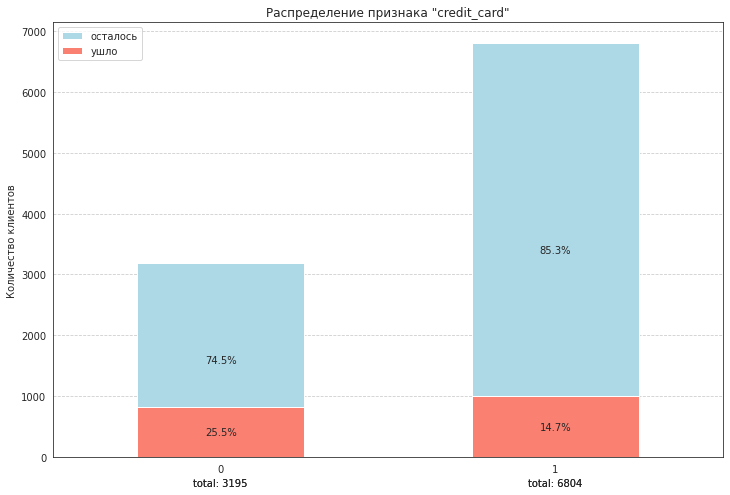

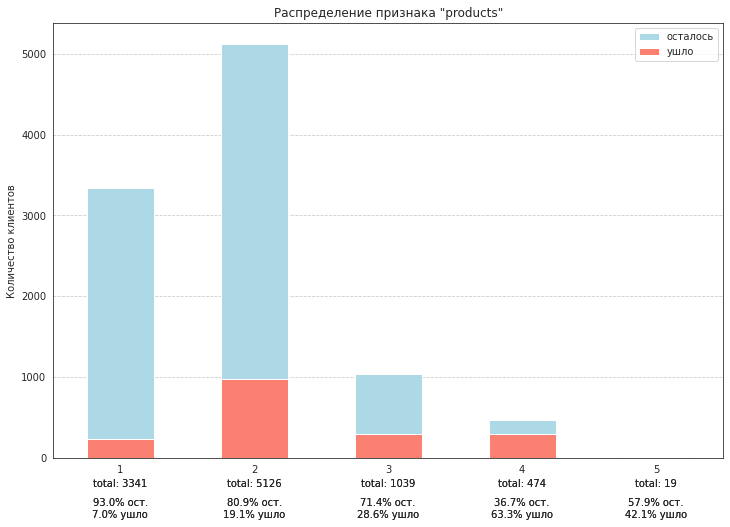

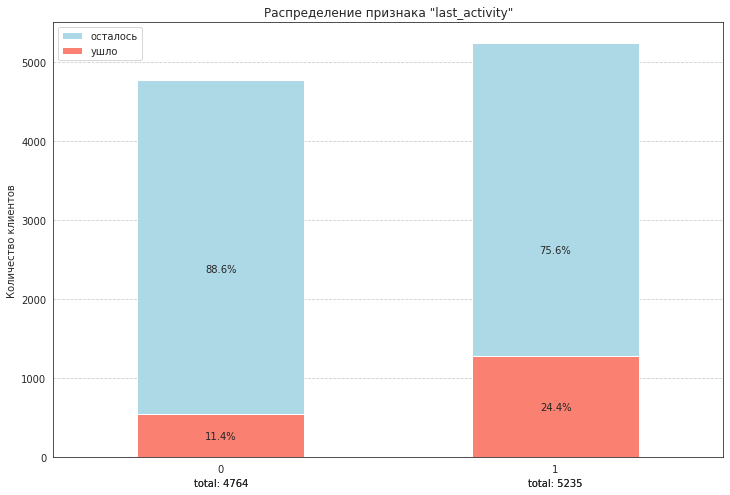

In [18]:

# Фильтрация категориальных столбцов
categorical_columns = ['city', 'equity', 'gender', 'credit_card', 'products', 'last_activity'] 

# Определение столбца 'churn' в отдельный DataFrame для удобства
df_churn = df[df['churn'] == 1]
df_stay = df[df['churn'] == 0]

# Настройка стиля осей
with sns.axes_style('white'):
    for col in categorical_columns:
        data_all = df[col].value_counts().sort_index()
        data_churn = df_churn[col].value_counts().reindex(data_all.index, fill_value=0).sort_index()
        data_stay = df_stay[col].value_counts().reindex(data_all.index, fill_value=0).sort_index()

        # Расчет процентов
        percentage_stay = (data_stay / data_all).sort_index() * 100
        percentage_churn = (data_churn / data_all).sort_index() * 100

        # Визуализация
        fig, ax = plt.subplots(figsize=(12, 8))  
        bar_plot = data_all.plot(kind='bar', stacked=True, color='lightblue', ax=ax, label='осталось')
        data_churn.plot(kind='bar', stacked=True, color='salmon', ax=ax, label='ушло')

        # Добавление подписей
        for i, rect in enumerate(bar_plot.patches):
            height = rect.get_height()
            y = rect.get_y()
            # Подписи для процентов над столбцами
            if col not in ['products', 'equity']:
                if i < len(bar_plot.patches) / 2:  # Подписи для "остался"
                    label = f'{percentage_stay.iloc[i]:.1f}%'
                else:  # Подписи для "ушел"
                    label = f'{percentage_churn.iloc[i - len(bar_plot.patches) // 2]:.1f}%'
                ax.text(rect.get_x() + rect.get_width() / 2, y + height / 2, label, ha='center', va='center')
                total_label = f'total: {data_all.iloc[i % len(data_all)]}'
                ax.text(rect.get_x() + rect.get_width() / 2, y - 0.05 * max(data_all), total_label, ha='center', va='top')
            # Подписи под гистограммой
            else:
                label_under = f'{percentage_stay.iloc[i % len(percentage_stay)]:.1f}% ост.\n{percentage_churn.iloc[i % len(percentage_churn)]:.1f}% ушло'
                ax.text(rect.get_x() + rect.get_width() / 2, -500, label_under, ha='center', va='top')
                total_label = f'total: {data_all.iloc[i % len(data_all)]}'
                ax.text(rect.get_x() + rect.get_width() / 2, y - 0.05 * max(data_all), total_label, ha='center', va='top')
                
        plt.title(f'Распределение признака "{col}"')
        plt.xticks(rotation=0)
        plt.ylabel('Количество клиентов')
        plt.grid(axis='y', linestyle='--')
        plt.legend()

        plt.show()

В процентном соотношении:
- Больше всего склонны к оттоку клиенты из Ярославля (19%) и Ростова (18.8%)
- Среди мужчин 23.6 процента склонны к уходу из банка
- Среди клиентов у которых нет кредитной карты 25.6 процентов склонны к уходу из банка
- По набору банковских продуктов высокая склонность к оттоку у клиентов с 3 продуктами, так же чуть выше среднего склонность к оттоку у клиентов с 2 продуктами. Данные по клиентам с 5 продуктами не будем принимать в серьез, ввиду малого количества наблюдений ( 19 наблюдений по 5 продуктам)
- Чаще уходят активные клиенты. 24.4% из них в итоге перестали обслуживаться в банке.
- Повышенный процент оттока среди клиентов у которых более 3 объектов собственности

<a id='13'></a>
##### Матрица корреляции

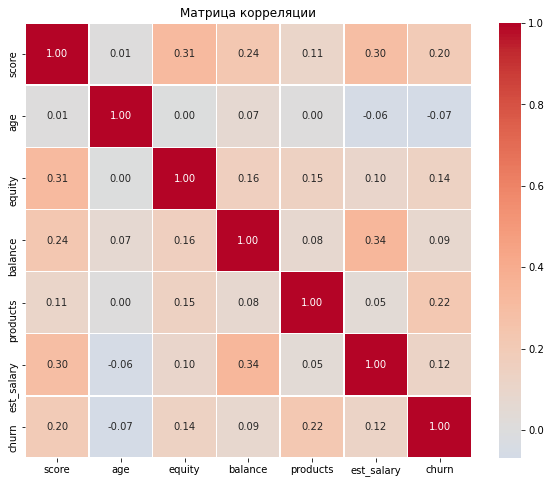

In [19]:
# Подготовим данные
numeric_cols = ['score', 'age', 'equity', 'balance', 'products', 'est_salary', 'gender', 'churn']
numeric_data = df[numeric_cols].dropna()

# Создадим матрицу корреляции
correlation_matrix = numeric_data.corr()

# Зададим размер графика
plt.figure(figsize=(10, 8))

# Нарисуем тепловую карту
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)
plt.title("Матрица корреляции")
plt.show()

Анализ корреляций по шкале Чеддока:
- Слабая (0.1 до 0.3 или -0.1 до -0.3)
- Умеренная (0.3 до 0.5 или -0.3 до -0.5)
- Заметная (0.5 до 0.7 или -0.5 до -0.7)
- Высокая (0.7 до 0.9 или -0.7 до -0.9)
- Очень высокая (0.9 до 1.0 или -0.9 до -1.0)

По интересующем нас параметру churn имеет место только слабая корреляция.

<a id='14'></a>
##### Посчитаем корреляцию по phik

In [20]:
# Пропишем непрерывные столбцы для phik
interval_cols = ['score', 'age', 'balance', 'est_salary']

df_no_id = df.drop('user_id', axis=1)

phik_matrix = df_no_id.phik_matrix(interval_cols=interval_cols)

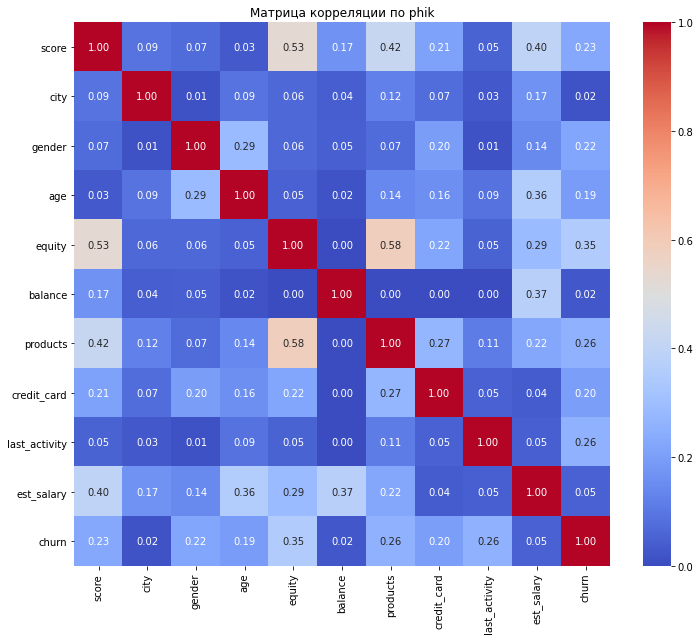

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляции по phik")
plt.show()

Анализ корреляций по шкале Чеддока:
- Слабая (0.1 до 0.3 или -0.1 до -0.3)
- Умеренная (0.3 до 0.5 или -0.3 до -0.5)
- Заметная (0.5 до 0.7 или -0.5 до -0.7)
- Высокая (0.7 до 0.9 или -0.7 до -0.9)
- Очень высокая (0.9 до 1.0 или -0.9 до -1.0)

Самую высокую взамосвязь с churn мы видим по products(0.44), это умеренная корреляция. Отмечу что, данная корреляция, с моей точки не является неким решающим фактором оттока. Так как стандартно у многих пользователей более 1 банковского продукта. Обязательно есть карта, есть текущий счет, может быть вклад, кредит, инвестиционный продукт, накопительный счет. Но логично то, что более активный потребитель банковских услуг ( человек у которого более 2 продуктов) склонен к сравнению и поиску наиболее выгодных для себя банков. Так же в умеренную корреляцию попадаем equity (0.35). Корреляции с age, score, gender, credit_card и balance являются слабыми.

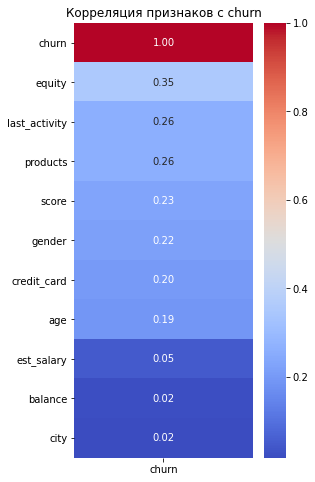

In [22]:
churn_col = phik_matrix['churn'].to_frame()

# Визуализация матрицы корреляции для 'churn'
plt.figure(figsize=(4, 8))  
sns.heatmap(churn_col.sort_values(by='churn', ascending=False), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция признаков с churn")
plt.show()

<a id='15'></a>
##### Портрет  клиента

In [23]:
# Группируем данные по churn
grouped_data = df.groupby('churn')

# Высчитываем среднее и медиану для числовых данных
mean_values = grouped_data[numeric_cols].mean()
median_values = grouped_data[numeric_cols].median()

# Высчитываем моду для категориальных данных
mode_city = grouped_data['city'].agg(pd.Series.mode)
mode_gender = grouped_data['gender'].agg(pd.Series.mode)
mode_credit_card = grouped_data['credit_card'].agg(pd.Series.mode)
mode_last_activity = grouped_data['last_activity'].agg(pd.Series.mode)

# Высчитываем относительную разницу между средними значениями
relative_difference = round(((mean_values.loc[0] - mean_values.loc[1]) / mean_values.loc[1] * 100), 2)

relative_difference_median = round(((median_values.loc[0] - median_values.loc[1]) / median_values.loc[1] * 100), 2)

# Подготавливаем таблицу с результатами для среднего и медианы
result_table = pd.concat([mean_values.T, median_values.T], axis=1)
result_table.columns = ['Среднее (Не отток)', 'Среднее (Отток)', 'Медиана (Не отток)', 'Медиана (Отток)']

# Добавляем столбцы с относительной разницей
result_table['Относительная разница (%)'] = relative_difference.T
result_table['Относительная разница медианы (%)'] = relative_difference_median.T

# Добавляем результаты с модой
mode_data = pd.DataFrame({
    'Среднее (Не отток)': [mode_city[0], mode_gender[0], mode_credit_card[0]],
    'Среднее (Отток)': [mode_city[1], mode_gender[1], mode_credit_card[1]],
    'Медиана (Не отток)': [None, None, None],
    'Медиана (Отток)': [None, None, None],
    'Относительная разница (%)': [None, None, None],
    'Относительная разница медианы (%)': [None, None, None]
}, index=['Мода по городу', 'Мода по полу', 'Мода по кредитной карте'])

result_table = result_table.append(mode_data)

result_table

,Среднее (Не отток),Среднее (Отток),Медиана (Не отток),Медиана (Отток),Относительная разница (%),Относительная разница медианы (%)
score,845.428362,863.346894,848.0,866.0,-2.08,-2.08
age,43.01996,41.430308,40.0,39.0,3.84,2.56
equity,2.374817,3.764156,3.0,4.0,-36.91,-25.0
balance,733982.585648,1133993.27145,475382.445,782410.47,-35.27,-39.24
products,1.757579,2.37713,2.0,2.0,-26.06,0.0
est_salary,147783.200108,148310.728202,118257.715,125395.22,-0.36,-5.69
churn,0.0,1.0,0.0,1.0,-100.0,-100.0
Мода по городу,Ярославль,Ярославль,None,None,None,None
Мода по полу,Ж,М,None,None,None,None
Мода по кредитной карте,1,1,None,None,None,None


- По значениям score видим не большую разницу в 2% по среднему и медиане.
- По age видим разницу в 3.79% по среднему и 2.56% по медиане.
- Более серьезные расхождения по equity. Видим 36.9% разницу по средним значениям и 25% по медиане.
- Разница в est_salary по средним значениям 0.31%, по медианным 5.69%
- По products видим то что в среднем клиент покидающий банк имеет больше банковский продуктов, это более активный потребитель.

<a id='16'></a>
##### Вывод

По итогам исследовательского анализа данных:
- Видим что уходит много клиентов с хорошим кредтным рейтингом от 825 по 910
- Большинство наших клиентов из Ярославля, среди жителей этого города самый высокий колиественный и процентный отток
- Клиенты с балансом выше 750 000 чаще уходят из банка
- Мужчин и женщин примерно поровну, но churn rate мужчин ощутимо выше чем у женщин
- Уровень оттока повышенный среди людей от 25 до 35 лет. Так же повышенный уровень оттока у людей от 50 до 60 лет.
- Выше среднего уровень оттока по клиентом у которых более 3 объектов в собственности
- Повышенный уровень оттока у клиентов с балансом от 750 000
- Выше среднего уровень оттока у клиентов с 3, 4 и 5 банковскими продуктами
- Выше уровень оотока среди тех у кого нет кредитной карты
- Выше уровень оттока среди активных клиентов
- Чуть более склонны к оттоку клиенты с зарплатой выше средней по клиентам банка

<a id='17'></a>
#### Проверка статистических гипотез

<a id='18'></a>
##### Проверка гипотез равенстве долей ушедших клиентов среди клиентов у которых есть/нет кредитных карт.

Будем использовать z-тест для двух пропорций. Этот тест позволяет сравнить доли между двумя независимыми группами.

Нулевая гипотеза (H₀):
Доли ушедших клиентов равны между клиентами с кредитной картой и клиентами без кредитной карты.
<br>
Альтернативная гипотеза (H₁):
Доли ушедших клиентов различаются между этими двумя группами.

In [24]:
# Подготовка данных для групп
group_with_card = df[df['credit_card'] == 1]['churn']
group_without_card = df[df['credit_card'] == 0]['churn']

# Количество ушедших в каждой группе
count_with_card = group_with_card.sum()
count_without_card = group_without_card.sum()

# Общее количество клиентов в каждой группе
all_with_card = len(group_with_card)
all_without_card = len(group_without_card)

# Проведение z-теста для сравнения двух пропорций
stat, pval = proportions_ztest([count_with_card, count_without_card], [all_with_card, all_without_card])

stat, pval

(-13.051770089391798, 6.208788084566672e-39)

Возьмем 0.05 за уровень значимости. По итогам теста мы отклоняем нулевую гипотезу в пользу альтернативной. Отрицательное z значение говорит о том что среди клиентов с кредитной картой доля уходящих выше. Р значение гораздо ниже уровня значимости, что говорит против нулевой гипотезы.

<a id='19'></a>
##### Проверка гипотезы о различии возраста между ушедшими и оставшимися клиентами

Выберем t_test так он подходит для сравнения средних показателей в независимых группах, распредение которых схоже с нормальным. ttest чуствителен к сильным выбросам, в наших данных по age нет сильных выбросов,  поэтому ttest подойдет.

Нулевая гипотеза (H₀):
Возраст ушедших и оставшишся клиентов равен (нет статистически значимой разницы)
<br>
Альтернативная гипотеза (H₁):
Возраст ушедших и оставшихся клиентов статистически значимо отличается

In [25]:
# Разделение данных на ушедших и оставшихся клиентов
departed = df[df['churn'] == 1]['age']
stayed = df[df['churn'] == 0]['age']

# Выполнение t-теста для независимых выборок
t_stat, p_value = ttest_ind(departed, stayed, equal_var=False)  # t-test Уэлча, который  не предполагает равенства дисперсий

t_stat, p_value

(-5.392210571017457, 7.519023009140847e-08)

Возьмем 0.05 за уровень значимости. По итогам теста мы отклоняем нулевую гипотезу в пользу альтернативной. T значение показывает что средние у ушедших клиентов статистически значимо ниже чем у оставшихся. Р значение ниже уровня значимости.

<a id='20'></a>
##### Гипотеза  о различии дохода между теми клиентами, которые ушли и теми, которые остались

Выберем t_test так он подходит для сравнения средних показателей в независимых группах, распредение которых схоже с нормальным.
ttest чуствителен к сильным выбросам, но попробуем провести этот тест на наших данных.

Нулевая гипотеза (H₀): Доходы между ушедшими и оставшимися клиентами равны. 
<br>
Альтернативная гипотеза (H₁): Доходы между ушедшими и оставшимися клиентами не равны.

In [26]:
# Подготовка данных для t-теста
salaries_departed = df[df['churn'] == 1]['est_salary']
salaries_stayed = df[df['churn'] == 0]['est_salary']

# Проведение t-теста для независимых выборок
t_stat_salary, p_value_salary = ttest_ind(salaries_departed, salaries_stayed, equal_var=False)  # t-test Уэлча, который  не предполагает равенства дисперсий

t_stat_salary, p_value_salary

(0.16053209039121677, 0.8724727072323815)

Возьмем 0.05 за уровень значимости. Мы не можем отклонить нулевую гипотезу, статистически значимых различий в средних наших групп по зарплате не нашлось. T статистика показывает очень незначительное превышение средней зарплаты у оставшихся клиентов.

Поскольку в наших данных длинных хвост вправо по зарплатному распределению, для сглаживания выбросов попробуем провести тест Манна-Уитни.

Нулевая гипотеза (H₀): Доходы между ушедшими и оставшимися клиентами равны.
Альтернативная гипотеза (H₁): Доходы между ушедшими и оставшимися клиентами не равны.

In [27]:
# Проведение теста Манна-Уитни
_, p_value = mannwhitneyu(salaries_departed, salaries_stayed, alternative='two-sided')

# Вывод результатов теста
print("P-value:", p_value)

P-value: 0.00021160652203623057


Возьмем за уровень значимости 0.05, в данном случае получается что у нас есть статистически значимые различия в заработной плате между ушедшими и оставшимися клиентами.

<a id='30'></a>
##### Вывод по проверке статистических гипотез:


- Доли ушедших пользователей значимо различаются между клиентам "с" или "без" крединой карты. Доля ушедших выше среди людей "без" кредитной карты
- Возраст ушедших клиентов статистически значимо ниже чем у оставшихся.
- Соласно тесту Манна-Уитни есть статистически значимая разница в доходе среди ушедших и оставшихся клиентов.

<a id='21'></a>
#### Сегментация клиентов

Распределение по оценке кредитного рейтинга:
<p>Видим что ушло много клиентов с хорошим средним рейтингом от 825 до 910</p><br>
Распределение по возрасту:
<p>Уровень оттока повышенный среди людей от 25 до 35 лет. Так же видно повышенный уровень оттока у людей от 50 до 60 лет.</p><br>
Распределение по балансу:
<p>При балансе свыше 750 тысяч клиенты чаще уходят из банка.</p><br>
Отток по количеству продуктов: <p>Наблюдается отток выше среднего уровня среди клиентов с 3, 4 и 2 продуктами. Клиенты с 1 или 2 продуктами демонстрируют более низкий уровень оттока.</p><br>
Отток по городам: <p>Клиенты из города Ярославль имеют самый высокий уровень оттока по сравнению с другими городами. В городе Ростов отток ниже, а в Рыбинске — наименьший.</p><br>
Отток по полу: <p>Среди мужчин отток заметно выше среднего уровня. У женщин отток ниже среднего.</p><br>
Отток по наличию кредитной карты: <p>среди клиентов без кредитной карты отток выше среднего</p><br>

Сегментацию клиентов будем проводить по алгоритму. Алгоритм будет искать максимальный churn_rate при сочетании вышеуказанных факторов. В критерии не возьмем город, будем делать универсальные рекомендации для всего банка. 

In [28]:
# Определение критериев сегментации
criteria = [
    'equity >= 3',
    'gender == "М"',
    'credit_card == 0',
    'age >= 25 and age <= 35',
    'age > 50 and age <= 60',
    'score >= 820 and score <= 910',
    'balance > 750000'
]

# Функция для анализа сегмента
def analyze_segment(query):
    segment = df.query(query)
    if len(segment) < 500:
        return None  # Пропускаем сегменты с менее чем 500 клиентов
    churn_rate = segment['churn'].mean()
    return churn_rate, len(segment) # Возвращет средний churn_rate и кол-во клиентов в сегменте

# Функция для поиска комбинаций
def find_churn_segments(criteria, top_n=3): #По умолчанию возьмем топ-3
    churn_segments = []

    # Перебор всех комбинаций 
    for crit in range(2, 4):
        for combination in itertools.combinations(criteria, crit):
            query = ' and '.join(combination) # Собираем строку для query
            result = analyze_segment(query) # Вызываем analyze_segment
            if result:
                churn_segments.append((query, result[0], result[1])) # Добавляем кортежи в итоговый список churn_segments

    # Сортируем найденные сегменты по уровню убывания оттока и берем топ 3
    churn_segments.sort(key=lambda x: x[1], reverse=True)
    return churn_segments[:top_n]

# Анализ сегментов
churn_segments = find_churn_segments(criteria)

# Вывод результатов
print("Сегменты с самым высоким уровнем оттока:")
for segment in churn_segments:
    print(f"Характеристики: {segment[0]}, Churn_Rate: {segment[1]:.2%}, Всего: {segment[2]}")


Сегменты с самым высоким уровнем оттока:
Характеристики: gender == "М" and credit_card == 0 and balance > 750000, Churn_Rate: 55.96%, Всего: 570
Характеристики: equity >= 3 and age >= 25 and age <= 35 and balance > 750000, Churn_Rate: 49.83%, Всего: 578
Характеристики: gender == "М" and score >= 820 and score <= 910 and balance > 750000, Churn_Rate: 48.76%, Всего: 765


<a id='22'></a>
##### Распределим сегоменты по приоритету

<a id='23'></a>
##### Приоритет номер 1: Сегмент по полу, наличию кредитной карты и балансу 

В данный сегмент входят:
<ul>Мужчины</ul>
<ul>Без кредитной карты</ul>
<ul>С балансом более 750 000</ul>

В данном сегменте самый высокий уровень Churn_Rate - 55.96%, в сегмент входит 570 человек.

<a id='24'></a>
##### Приоритет номер 2: Сегменты по балансу, собственности и возрасту

В данный сегмент входят:
<ul>Клиенты с имущественным баллом более 3</ul>
<ul>Возраст между 25 и 35 лет</ul>
<ul>С балансом более 750 000</ul>

В данном сегменте второй по объему Churn_Rate - 49.83%, в сегмент входит 578 человек.


<a id='25'></a>
##### Приоритет номер 3: Сегменты по полу, кредитному рейтингу и балансу

В данный сегмент входят:
<ul>Мужчины</ul>
<ul>С кредитным рейтингом 820-910 баллов</ul>
<ul>С балансом более 750 000</ul>

В данном сегменте самый высокий уровень Churn_Rate - 55.96%, в сегмент входит 570 человек.

<a id='26'></a>
##### Вывод по итогам сегментации клиентов


Получили три сегмента. Общее во всех трех сегментах это баланс свыше 750.000. В большинстве своем это мужчины, с имущественным баллом свыше 3, кредитным рейтингом от 820 до 910. И без кредитной карты.


<a id='27'></a>
#### Итоговый вывод

<font size="2"><strong>Основные выводы:</strong></font>

- Кредитный рейтинг: Клиенты с высоким кредитным рейтингом (825-910) склонны к уходу. Это может указывать на то, что клиенты с хорошей кредитной историей находят более выгодные предложения в других банках.
- Географическая концентрация: Наибольший отток наблюдается среди жителей Ярославля, что может свидетельствовать о наличии сильных конкурентов в этом регионе.
- Демографические и финансовые факторы: Отток высок среди молодежи (25-35 лет) и пожилых людей (50-60 лет), а также среди клиентов с балансом выше 750 000. Это указывает на возможные недостатки в услугах или продуктах, предлагаемых этим возрастным группам, а также в управлении большими суммами на счетах клиентов.
- Продукты и услуги: Высокий уровень оттока у клиентов, использующих 3-5 банковских продуктов, говорит о том, что это активное пользователи банковских услуг, которые ищут наиболее выгодные для себе предложения на рынке.
<br>

<font size="2"><strong>Рекомендации по работе с ключевыми сегментами:</strong></font>

1. Мужчины без кредитной карты с балансом свыше 750,000
<ul>Разработка эксклюзивных кредитных продуктов: Можем предложить этой группе эксклюзивные кредитные карты с привлекательными условиями, такими как повышенный кэшбэк на определенные категории расходов или бонусы за большие покупки.<br>
Персонализированные инвестиционные предложения: Учитывая высокий баланс, эти клиенты могут быть заинтересованы в инвестиционных продуктах. Можем предложить инвестиционные продукты с защитой капитала, специальные условия открытия инвестиционного счета.<br>
Улучшенный сервис накоплений: Можем предложить клиентам повышенный процент на остаток по балансу, повышенный процент по накопительным счетам и вкладам.</ul><br>

2. Клиенты с капиталом более 3, возрастом от 25 до 35 лет и балансом свыше 750,000
<ul>Целевые финансовые советы для молодых профессионалов: Эта категория клиентов может быть заинтересована в планировании своего финансового будущего. Можем организовать вебинары и семинары по финансовому планированию, инвестициям и управлению активами.<br>
Эксклюзивные предложения и услуги: Можем предложить программы лояльности или премиум-услуги, которые могут включать специальные предложения для путешествий, страхования или покупок.<br>
Мобильное банковское обслуживание: Учитывая возрастную категорию, уделите особое внимание мобильным банковским технологиям, предлагая удобные и инновационные приложения для управления счетами и инвестициями.</ul><br>

3. Мужчины с кредитным рейтингом от 820 до 910 и балансом свыше 750,000
<ul>Программы премиального обслуживания: Предложите услуги премиального класса, которые могут включать доступ к эксклюзивным мероприятиям, персонализированное обслуживание и привилегии, доступные только для членов премиального клуба.<br>
Индивидуальные кредитные предложения: Разработайте специальные кредитные предложения с низкими процентными ставками и улучшенными условиями для крупных покупок или инвестиций.<br>
Повышение финансовой грамотности и доверия: Можем проводить онлайн вебинары-консультации по управлению активами и капиталом, помогая клиентам оптимизировать их финансовые портфолио для достижения долгосрочных целей.</ul>